<a href="https://colab.research.google.com/github/kiwindow/PrognosisOfRejection/blob/master/Results_of_Leave_One_Out_CV_with_renaldata_by_ML_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1 System Environment

## 1) Mount this file on Google drive

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2) Data preparation : [Important]  Change the pass for renaldata.csv

In [16]:
# Loading modules
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns

# Change the pass: 'drive/My Drive/program/data/renaldata.clsv' to a new pass where renaldata.csv is located in your enviromnent 
df = pd.read_csv('drive/My Drive/program/data/renaldata.csv')
print('Number of colums and rows')
print(df.shape)
print()
print('Number of empty cells')
pd.set_option('display.max_rows', 1000)
df.isnull().sum()

Number of colums and rows
(51, 212)

Number of empty cells


RMale                        0
Rage                         0
InfectionCount               0
FeverOnly                    0
Pyrexia                      0
Inflammation                 0
VirusInfection               0
CMV                          0
anemia                       0
HeartDisease                 0
RespiratoryInfection         0
UpperRespiratoryInfection    0
UpperDigestivetract          0
Diarrhea                     0
UTI                          0
WBCinUrine                   0
WBCpeakover10                0
urology                      0
Skin                         0
WoundInfection               0
HerpesZoster                 0
Orthopedics                  0
Ascites                      0
Surgery                      0
AerobicGPC                   0
AerobicGNR                   0
candida                      0
staphylococcusaureus         0
streptococcusaureus          0
enterobacteraerogenes        0
enterobactereclacue          0
enterococcusfaecalis         0
citobact

In [17]:
# Interpolation of missing data   　df2: pandas data、    data: numpy data
df2 = df.fillna(df.median())
data = df2.values

df2.isnull().sum()

RMale                        0
Rage                         0
InfectionCount               0
FeverOnly                    0
Pyrexia                      0
Inflammation                 0
VirusInfection               0
CMV                          0
anemia                       0
HeartDisease                 0
RespiratoryInfection         0
UpperRespiratoryInfection    0
UpperDigestivetract          0
Diarrhea                     0
UTI                          0
WBCinUrine                   0
WBCpeakover10                0
urology                      0
Skin                         0
WoundInfection               0
HerpesZoster                 0
Orthopedics                  0
Ascites                      0
Surgery                      0
AerobicGPC                   0
AerobicGNR                   0
candida                      0
staphylococcusaureus         0
streptococcusaureus          0
enterobacteraerogenes        0
enterobactereclacue          0
enterococcusfaecalis         0
citobact

In [21]:
# Dividing explanatory variables and target variable
x = df2.iloc[:, :-1].values
t = df2.iloc[:, -1].values

# splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=0)

Number of columns and rows
(51, 212)

[[ 0.         37.          4.         ...  1.05       -0.48152822
   0.        ]
 [ 1.         66.          7.         ...  2.01       -0.46278072
   1.        ]
 [ 1.         62.          1.         ...  5.5        -0.69825448
   0.        ]
 ...
 [ 1.         29.          4.         ...  2.035       0.58015829
   0.        ]
 [ 1.         50.          1.         ...  2.035       0.53039126
   0.        ]
 [ 0.         45.          3.         ...  0.56        0.11566602
   0.        ]]

Distribution of target value


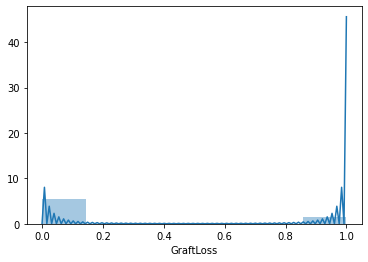

In [ ]:
# Size of dataset
print('Number of columns and rows')
print(df2.shape)
print()
print(data)
df2.head()
# Distribution of target
print()
print('Distribution of target value')
sns.distplot(df2.iloc[:,-1].dropna())

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Columns: 212 entries, RMale to GraftLoss
dtypes: float64(23), int64(189)
memory usage: 84.6 KB


In [ ]:
df2.describe()

,RMale,Rage,InfectionCount,FeverOnly,Pyrexia,Inflammation,VirusInfection,CMV,anemia,HeartDisease,RespiratoryInfection,UpperRespiratoryInfection,UpperDigestivetract,Diarrhea,UTI,WBCinUrine,WBCpeakover10,urology,Skin,WoundInfection,HerpesZoster,Orthopedics,Ascites,Surgery,AerobicGPC,AerobicGNR,candida,staphylococcusaureus,streptococcusaureus,enterobacteraerogenes,enterobactereclacue,enterococcusfaecalis,citobacterdiversus,pseudomonas,inflammationdatefirst,infectiondatelast,asthma,pastanemia,infarctionhemohorrage,calcification,...,NS,hypoplastickidney,MalignantHypertention,Banfi,Banfｔ,Banfｇ,Banfｖ,Banfci,Banfct,Banfcv,Banfcg,Banfptc,Banfptcbm,Banfah,Banfaah,InterstitialHemorrhage,CellInvasion,lymphinvasion,thrombusformation,coaglationnecrosis,IgA.1,IgM,IgG,SABC1q,C3,C4d,C5b,bulbarsclerosis,CRPpreRej,CRPpostRej,WBCpeakover5,MaxCRP,WBCpreRej,WBCpostKTx,WBCpeakover9postRej,MaxWBC,MMFpostRej,MMFatRej,CNIpostRej,GraftLoss
count,51.000000,51.000000,51.000000,51.00000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,...,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.666667,46.666667,4.843137,0.54902,0.117647,0.117647,0.490196,0.392157,0.431373,0.156863,0.215686,0.235294,0.196078,0.490196,2.392157,7.772784,2.352941,0.117647,0.098039,0.137255,0.078431,0.058824,0.176471,0.254902,0.372549,0.352941,0.058824,0.372549,0.039216,0.039216,0.078431,0.078431,0.039216,0.254902,6.274510,171.039216,0.039216,0.215686,0.058824,0.039216,...,0.117647,0.039216,0.039216,1.058824,1.254902,0.588235,0.411765,0.372549,0.372549,0.980392,0.058824,1.117647,0.176471,0.509804,0.098039,0.039216,1.156863,0.607843,0.058824,0.039216,0.137255,0.215686,0.058824,0.176471,0.078431,0.647059,0.058824,0.137255,0.412275,0.660075,2.705882,4.573725,0.822844,6.420745,20.901961,13.805294,2.867222,2.469706,0.030782,0.215686
std,0.476095,12.349359,3.258052,0.75667,0.381945,0.325396,0.504878,0.493089,0.500196,0.367290,0.415390,0.428403,0.400979,0.504878,2.173278,2.970686,2.037877,0.325396,0.300327,0.347540,0.271524,0.237635,0.385013,0.483452,0.488294,0.482640,0.237635,0.488294,0.196039,0.196039,0.271524,0.271524,0.196039,0.440143,7.189099,235.087385,0.196039,0.415390,0.237635,0.196039,...,0.325396,0.196039,0.196039,0.903588,1.055332,0.941838,0.725988,0.691687,0.691687,0.860005,0.237635,0.972565,0.477740,0.731370,0.360827,0.196039,0.857264,0.801958,0.237635,0.196039,0.347540,0.415390,0.237635,0.385013,0.271524,0.522438,0.237635,0.347540,0.753385,0.862803,6.546126,5.165955,0.942283,1.688243,26.501513,6.360069,1.479068,1.550337,1.286997,0.415390
min,0.000000,21.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.542000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.042870,0.000000,0.040000,0.000000,3.076000,0.000000,4.040000,1.062500,0.540000,-0.947254,0.000000
25%,0.000000,36.000000,3.000000,0.00000,0.000000,0.000000,0.000000,0.00

## 3) Installation of Optuna and XGBoost

In [ ]:
# Installation of Optuna
!pip install optuna

     |████████████████████████████████| 235kB 4.7MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 163kB 11.2MB/s 
     |████████████████████████████████| 81kB 5.4MB/s 
     |████████████████████████████████| 81kB 6.7MB/s 
     |████████████████████████████████| 112kB 14.8MB/s 
     |████████████████████████████████| 133kB 12.9MB/s 
     |████████████████████████████████| 51kB 4.5MB/s 
  Created wheel for optuna: filename=optuna-2.1.0-cp36-none-any.whl size=321090 sha256=c0504c895410e56740b4b4dda5d4f24e2700a1340d06e1391777a89182a15d00
  Stored in directory: /root/.cache/pip/wheels/9f/25/24/a165483933b5eefbf4f93c85f3188dc696cbb38620b73ad713
Successfully built optuna
  Created wheel for pyperclip: filename=pyperclip-1.8.0-cp36-none-any.whl size=8693 sha256=e7b553fae2875673e98b458a3470fc475033f60cf3f5b44ff44f29b465ce6c59
  Stored in directory: /root/.cache/pip/wheels/b

In [ ]:
# Installation of XGBoost
!pip3 install xgboost
!pip3 install -q pydot
!pip3 install graphviz

# 2. Leave-One-Out cross validation with machine learning models

## 1) Simple Linear Regression ; ACU 0.498

In [ ]:
def linear():
    import numpy as np
    import pandas as pd
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import LeaveOneOut

    # Statistical functions
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import r2_score

    # Rounding of fractional point
    import math
    def my_round(val, digit=0):
        p = 10 ** digit
        return (val * p * 2 + 1) // 2 / p


    x = []
    t = []

    # Predicted value
    pred = []
    round = []
    pairs = []

    for row in data:
        u = []
        t.append(int(row[-1]))
        for i in range(0, len(row)-1):
            u.append(float(row[i]))
        x.append(u)

    x = np.array(x)
    t = np.array(t)


    loo = LeaveOneOut()
    entire_count = loo.get_n_splits(x)
    lr = LinearRegression()

    for train_index, test_index in loo.split(x):
        x_train, x_test = x[train_index], x[test_index]
        t_train, t_test = t[train_index], t[test_index]
        lr.fit(x_train, t_train)
        result = lr.predict(x_test)
        pred.append(result[0])

        # Category of prediction
        if (result[0]<0.5):
            round.append(int(0))
        else:
            round.append(int(1)) 

    for i in range(len(pred)):
        pairs.append([pred[i], t[i]])

    output = pd.DataFrame(pairs)
    # output.to_csv('drive/My Drive/program/data/cstatdata.csv', index=False)

    # Coefficient of Determination
    r2 = r2_score(t, pred)
    # AUC
    auc = roc_auc_score(t, pred)

    # Confusion Matrix
    TP = 0
    FP = 0
    FN = 0
    TN = 0

    for i in range(len(round)):
        if (round[i]==1) & (t[i]==1):
            TP += 1
        elif (round[i]==1) & (t[i]==0):
            FP += 1
        elif (round[i]==0) & (t[i]==1):
            FN += 1
        elif (round[i]==0) & (t[i]==0):
            TN += 1

    confmat =  [[TP, FP], [FN, TN]]

    acc = (TP+TN)/(TP+FP+FN+TN)
    
    if TP + FP != 0:
        prec = TP/(TP+FP)
    elif TP + FP == 0:
        prec = 'N/A'
    if TP + FN != 0:
        rec = TP/(TP+FN)
    elif TP + FP ==0:
        rec = 'N/A'
    if TN + FP != 0:
        spec = TN/(TN + FP)
    elif TN + FP == 0:
        spec = 'N/A'
    if TP + FP/2 + FN/2 != 0:
        f1 = TP/(TP + FP/2 + FN/2)
    elif TP + FP/2 + FN/2 == 0:
        f1 = 'N/A'

    res = np.array([auc, acc, prec, rec, f1, spec, [[TP, FP], [FN, TN]], r2])

    # Output　: ( 1. AUC, 2, Accuracy, 3. Precision 4. Recall 5. f1-score 6. Specificity, 7. Confusion Matrix, 8. R^2 in LOO)

    print('■ Leave-One-Out Cross Validation with Simple Linear Regression')
    print('')
    print('Sample size of all dataset: ' + str(len(x_train) + len(x_test)) )  
    print('Sample size of training data: ' + str(len(x_train)) + '     Explanatory variables: ' + str(x_train.shape) + '   Target value: ' + str(t_train.shape))
    print('Sample size of test data: ' + str(len(x_test)) + '     Explanatory variables: ' + str(x_test.shape) + '   Target value: ' + str(t_test.shape))
    print('')
    print('AUC: ' + str(my_round(auc, 5)) + '   Accuracy: ' + str(my_round(acc,5)) + '   R2: ' + str(my_round(r2,5)))    
    print('')
    print(pd.DataFrame(np.array(confmat), index=['Predict True', 'Predict False'], columns=['Actual True', 'Actual False']))
    print('')
    print('Output: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. Confution matrix 8. R^2 in LOO')
    print('')


    return res

In [ ]:
linear()

■ Leave-One-Out Cross Validation with Simple Linear Regression

Sample size of all dataset: 51
Sample size of training data: 50     Explanatory variables: (50, 211)   Target value: (50,)
Sample size of test data: 1     Explanatory variables: (1, 211)   Target value: (1,)

AUC: 0.49773   Accuracy: 0.62745   R2: -2.04515

               Actual True  Actual False
Predict True             3            11
Predict False            8            29

Output: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. Confution matrix 8. R^2 in LOO



array([0.49772727272727274, 0.6274509803921569, 0.21428571428571427,
       0.2727272727272727, 0.24, 0.725, list([[3, 11], [8, 29]]),
       -2.04515491157451], dtype=object)

## 2) Lasso Regression ; AUC 0.734

In [ ]:
def lasso(a):
    import numpy as np
    import pandas as pd
    from sklearn.linear_model import Lasso
    from sklearn.model_selection import LeaveOneOut

    # Statistical functions
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import r2_score

    # Rounding of fractional point
    import math
    def my_round(val, digit=0):
        p = 10 ** digit
        return (val * p * 2 + 1) // 2 / p

    x = []
    t = []

    # Predicted value
    pred = []
    round = []
    pairs = []

    for row in data:
        u = []
        t.append(int(row[-1]))
        for i in range(0, len(row)-1):
            u.append(float(row[i]))
        x.append(u)

    x = np.array(x)
    t = np.array(t)

    loo = LeaveOneOut()
    entire_count = loo.get_n_splits(x)
    lr = Lasso(alpha=a)

    for train_index, test_index in loo.split(x):
        x_train, x_test = x[train_index], x[test_index]
        t_train, t_test = t[train_index], t[test_index]
        lr.fit(x_train, t_train)
        result = lr.predict(x_test)
        pred.append(result[0])

        	# Category of prediction
        if (result[0]<0.5):
            round.append(int(0))
        else:
            round.append(int(1)) 

    for i in range(len(pred)):
        pairs.append([pred[i], t[i]])

    output = pd.DataFrame(pairs)
    # output.to_csv('drive/My Drive/program/data/cstatdata.csv', index=False)

    # Coefficient of Determination
    r2 = r2_score(t, pred)
    # AUC
    auc = roc_auc_score(t, pred)

    # Confusion Matrix
    TP = 0
    FP = 0
    FN = 0
    TN = 0

    for i in range(len(round)):
        if (round[i]==1) & (t[i]==1):
            TP += 1
        elif (round[i]==1) & (t[i]==0):
            FP += 1
        elif (round[i]==0) & (t[i]==1):
            FN += 1
        elif (round[i]==0) & (t[i]==0):
            TN += 1

    confmat = [[TP, FP], [FN, TN]]

    acc = (TP+TN)/(TP+FP+FN+TN)

    if TP + FP != 0:
        prec = TP/(TP+FP)
    elif TP + FP == 0:
        prec = 'N/A'
    if TP + FN != 0:
        rec = TP/(TP+FN)
    elif TP + FP ==0:
        rec = 'N/A'
    if TN + FP != 0:
        spec = TN/(TN + FP)
    elif TN + FP == 0:
        spec = 'N/A'
    if TP + FP/2 + FN/2 != 0:
        f1 = TP/(TP + FP/2 + FN/2)
    elif TP + FP/2 + FN/2 == 0:
        f1 = 'N/A'

    res = np.array([auc, acc, prec, rec, f1, spec, confmat, r2])

    # Output　: ( 1. AUC, 2, Accuracy, 3. Precision 4. Recall 5. f1-score 6. Specificity, 7. Confusion Matrix, 8. R^2 in LOO)

    print('■ Leave-One-Out Cross Validation with Lasso Regression')
    print('')
    print('Sample size of all dataset: ' + str(len(x_train) + len(x_test)) )  
    print('Sample size of training data: ' + str(len(x_train)) + '     Explanatory variables: ' + str(x_train.shape) + '   Target value: ' + str(t_train.shape))
    print('Sample size of test data: ' + str(len(x_test)) + '     Explanatory variables: ' + str(x_test.shape) + '   Target value: ' + str(t_test.shape))
    print('')
    print('AUC: ' + str(my_round(auc, 5)) + '   Accuracy: ' + str(my_round(acc,5)) + '   R2: ' + str(my_round(r2,5)))    
    print('')
    print(pd.DataFrame(np.array(confmat), index=['Predict True', 'Predict False'], columns=['Actual True', 'Actual False']))
    print('')
    print('Output: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. Confution matrix 8. R^2 in LOO')
    print('')

    return res

In [ ]:
lasso(0.1)

■ Leave-One-Out Cross Validation with Lasso Regression

Sample size of all dataset: 51
Sample size of training data: 50     Explanatory variables: (50, 211)   Target value: (50,)
Sample size of test data: 1     Explanatory variables: (1, 211)   Target value: (1,)

AUC: 0.66591   Accuracy: 0.72549   R2: -0.19725

               Actual True  Actual False
Predict True             2             5
Predict False            9            35

Output: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. Confution matrix 8. R^2 in LOO



array([0.665909090909091, 0.7254901960784313, 0.2857142857142857,
       0.18181818181818182, 0.2222222222222222, 0.875,
       list([[2, 5], [9, 35]]), -0.19725016235878678], dtype=object)

In [ ]:
lasso(0.01)

■ Leave-One-Out Cross Validation with Lasso Regression

Sample size of all dataset: 51
Sample size of training data: 50     Explanatory variables: (50, 211)   Target value: (50,)
Sample size of test data: 1     Explanatory variables: (1, 211)   Target value: (1,)

AUC: 0.69318   Accuracy: 0.66667   R2: -0.72191

               Actual True  Actual False
Predict True             4            10
Predict False            7            30

Output: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. Confution matrix 8. R^2 in LOO



array([0.6931818181818181, 0.6666666666666666, 0.2857142857142857,
       0.36363636363636365, 0.32, 0.75, list([[4, 10], [7, 30]]),
       -0.7219084222358687], dtype=object)

In [ ]:
lasso(10)

■ Leave-One-Out Cross Validation with Lasso Regression

Sample size of all dataset: 51
Sample size of training data: 50     Explanatory variables: (50, 211)   Target value: (50,)
Sample size of test data: 1     Explanatory variables: (1, 211)   Target value: (1,)

AUC: 0.43409   Accuracy: 0.76471   R2: -0.06329

               Actual True  Actual False
Predict True             0             1
Predict False           11            39

Output: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. Confution matrix 8. R^2 in LOO



array([0.434090909090909, 0.7647058823529411, 0.0, 0.0, 0.0, 0.975,
       list([[0, 1], [11, 39]]), -0.06329137947570573], dtype=object)

### Optimization with Optuna

In [ ]:
def lassoOptuna(trial):
    import numpy as np
    import pandas as pd
    from sklearn.linear_model import Lasso
    from sklearn.model_selection import LeaveOneOut

    import optuna

    # Statistical functions
    from sklearn.metrics import roc_auc_score

    alpha = trial.suggest_uniform('alpha', 0.01, 1)

    x = []
    t = []

    # Rounding of fractional point
    pred = []

    for row in data:
        u = []
        t.append(int(row[-1]))
        for i in range(0, len(row)-1):
            u.append(float(row[i]))
        x.append(u)
    x = np.array(x)
    t = np.array(t)

    loo = LeaveOneOut()
    entire_count = loo.get_n_splits(x)
    lr = Lasso(alpha=alpha)

    for train_index, test_index in loo.split(x):
        x_train, x_test = x[train_index], x[test_index]
        t_train, t_test = t[train_index], t[test_index]
        lr.fit(x_train, t_train)
        result = lr.predict(x_test)
        pred.append(result[0])
     
    # AUC
    auc = roc_auc_score(t, pred)

    res = auc
    # minimize 1 - AUC
    return 1/res


def lassoTrial(n_trials):
    import optuna
    study = optuna.create_study()
    study.optimize(lassoOptuna, n_trials)
    # result
    print()
    print('hyper parameter：', study.best_params)
    print('AUC：', 1/study.best_value)    

In [ ]:
lassoTrial(100)

[I 2020-09-19 09:36:57,374] A new study created in memory with name: no-name-8a3b1555-260d-4b9d-81c8-b6b0f7863917
[I 2020-09-19 09:36:57,446] Trial 0 finished with value: 1.7322834645669292 and parameters: {'alpha': 0.5468973635867508}. Best is trial 0 with value: 1.7322834645669292.
[I 2020-09-19 09:36:57,522] Trial 1 finished with value: 1.8181818181818181 and parameters: {'alpha': 0.3164828966134761}. Best is trial 0 with value: 1.7322834645669292.
[I 2020-09-19 09:36:57,594] Trial 2 finished with value: 1.8410041841004183 and parameters: {'alpha': 0.2863582888630547}. Best is trial 0 with value: 1.7322834645669292.
[I 2020-09-19 09:36:57,674] Trial 3 finished with value: 1.685823754789272 and parameters: {'alpha': 0.6339916873793024}. Best is trial 3 with value: 1.685823754789272.
[I 2020-09-19 09:36:57,738] Trial 4 finished with value: 1.7054263565891472 and parameters: {'alpha': 0.7962267259138708}. Best is trial 3 with value: 1.685823754789272.
[I 2020-09-19 09:36:57,806] Trial 


hyper parameter： {'alpha': 0.041913481574417606}
AUC： 0.734090909090909


In [ ]:
# This alpha value is one example of hyperparameter optimization. There are other values that yield a similar AUC value.
lasso(0.041913481574417606)

■ Leave-One-Out Cross Validation with Lasso Regression

Sample size of all dataset: 51
Sample size of training data: 50     Explanatory variables: (50, 211)   Target value: (50,)
Sample size of test data: 1     Explanatory variables: (1, 211)   Target value: (1,)

AUC: 0.73409   Accuracy: 0.72549   R2: -0.16791

               Actual True  Actual False
Predict True             3             6
Predict False            8            34

Output: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. Confution matrix 8. R^2 in LOO



array([0.734090909090909, 0.7254901960784313, 0.3333333333333333,
       0.2727272727272727, 0.3, 0.85, list([[3, 6], [8, 34]]),
       -0.1679078135148202], dtype=object)

## 3) Ridge Regression ; AUC 0.632

In [ ]:
def ridge(a):
    import numpy as np
    import pandas as pd
    from sklearn.linear_model import Ridge
    from sklearn.model_selection import LeaveOneOut

    # Statistical functions
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import r2_score

    # Rounding of fractional point
    import math
    def my_round(val, digit=0):
        p = 10 ** digit
        return (val * p * 2 + 1) // 2 / p

    x = []
    t = []

    # Predicted value
    pred = []
    round = []
    pairs = []

    for row in data:
        u = []
        t.append(int(row[-1]))
        for i in range(0, len(row)-1):
            u.append(float(row[i]))
        x.append(u)

    x = np.array(x)
    t = np.array(t)

    loo = LeaveOneOut()
    entire_count = loo.get_n_splits(x)
    lr = Ridge(alpha=a)

    for train_index, test_index in loo.split(x):
        x_train, x_test = x[train_index], x[test_index]
        t_train, t_test = t[train_index], t[test_index]
        lr.fit(x_train, t_train)
        result = lr.predict(x_test)
        pred.append(result[0])

        # Category of prediction
        if (result[0]<0.5):
            round.append(int(0))
        else:
            round.append(int(1)) 

    for i in range(len(pred)):
        pairs.append([pred[i], t[i]])

    output = pd.DataFrame(pairs)
    # output.to_csv('drive/My Drive/program/data/cstatdata.csv', index=False)

    # Coefficient of Determination
    r2 = r2_score(t, pred)
    # AUC
    auc = roc_auc_score(t, pred)

    # Confusion Matrix
    TP = 0
    FP = 0
    FN = 0
    TN = 0

    for i in range(len(round)):
        if (round[i]==1) & (t[i]==1):
            TP += 1
        elif (round[i]==1) & (t[i]==0):
            FP += 1
        elif (round[i]==0) & (t[i]==1):
            FN += 1
        elif (round[i]==0) & (t[i]==0):
            TN += 1

    confmat = [[TP, FP], [FN, TN]]

    acc = (TP+TN)/(TP+FP+FN+TN)

    if TP + FP != 0:
        prec = TP/(TP+FP)
    elif TP + FP == 0:
        prec = 'N/A'
    if TP + FN != 0:
        rec = TP/(TP+FN)
    elif TP + FP ==0:
        rec = 'N/A'
    if TN + FP != 0:
        spec = TN/(TN + FP)
    elif TN + FP == 0:
        spec = 'N/A'
    if TP + FP/2 + FN/2 != 0:
        f1 = TP/(TP + FP/2 + FN/2)
    elif TP + FP/2 + FN/2 == 0:
        f1 = 'N/A'

    res = np.array([auc, acc, prec, rec, f1, spec, confmat, r2])

    # Output　: ( 1. AUC, 2, Accuracy, 3. Precision 4. Recall 5. f1-score 6. Specificity, 7. Confusion Matrix, 8. R^2 in LOO)

    print('■ Leave-One-Out Cross Validation with Ridge Regression')
    print('')
    print('Sample size of all dataset: ' + str(len(x_train) + len(x_test)) )  
    print('Sample size of training data: ' + str(len(x_train)) + '     Explanatory variables: ' + str(x_train.shape) + '   Target value: ' + str(t_train.shape))
    print('Sample size of test data: ' + str(len(x_test)) + '     Explanatory variables: ' + str(x_test.shape) + '   Target value: ' + str(t_test.shape))
    print('')
    print('AUC: ' + str(my_round(auc, 5)) + '   Accuracy: ' + str(my_round(acc,5)) + '   R2: ' + str(my_round(r2,5)))    
    print('')
    print(pd.DataFrame(np.array(confmat), index=['Predict True', 'Predict False'], columns=['Actual True', 'Actual False']))
    print('')
    print('Output: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. Confution matrix 8. R^2 in LOO')
    print('')

    return res

In [ ]:
ridge(1)

■ Leave-One-Out Cross Validation with Ridge Regression

Sample size of all dataset: 51
Sample size of training data: 50     Explanatory variables: (50, 211)   Target value: (50,)
Sample size of test data: 1     Explanatory variables: (1, 211)   Target value: (1,)

AUC: 0.51818   Accuracy: 0.62745   R2: -1.91292

               Actual True  Actual False
Predict True             3            11
Predict False            8            29

Output: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. Confution matrix 8. R^2 in LOO



array([0.5181818181818182, 0.6274509803921569, 0.21428571428571427,
       0.2727272727272727, 0.24, 0.725, list([[3, 11], [8, 29]]),
       -1.9129247728164027], dtype=object)

In [ ]:
ridge(100)

■ Leave-One-Out Cross Validation with Ridge Regression

Sample size of all dataset: 51
Sample size of training data: 50     Explanatory variables: (50, 211)   Target value: (50,)
Sample size of test data: 1     Explanatory variables: (1, 211)   Target value: (1,)

AUC: 0.62727   Accuracy: 0.70588   R2: -0.46392

               Actual True  Actual False
Predict True             3             7
Predict False            8            33

Output: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. Confution matrix 8. R^2 in LOO



array([0.6272727272727272, 0.7058823529411765, 0.3, 0.2727272727272727,
       0.2857142857142857, 0.825, list([[3, 7], [8, 33]]),
       -0.4639196454021983], dtype=object)

In [ ]:
ridge(1000)

■ Leave-One-Out Cross Validation with Ridge Regression

Sample size of all dataset: 51
Sample size of training data: 50     Explanatory variables: (50, 211)   Target value: (50,)
Sample size of test data: 1     Explanatory variables: (1, 211)   Target value: (1,)

AUC: 0.59091   Accuracy: 0.72549   R2: -0.21508

               Actual True  Actual False
Predict True             2             5
Predict False            9            35

Output: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. Confution matrix 8. R^2 in LOO



array([0.5909090909090909, 0.7254901960784313, 0.2857142857142857,
       0.18181818181818182, 0.2222222222222222, 0.875,
       list([[2, 5], [9, 35]]), -0.2150790729071388], dtype=object)

In [ ]:
ridge(0.1)

■ Leave-One-Out Cross Validation with Ridge Regression

Sample size of all dataset: 51
Sample size of training data: 50     Explanatory variables: (50, 211)   Target value: (50,)
Sample size of test data: 1     Explanatory variables: (1, 211)   Target value: (1,)

AUC: 0.5   Accuracy: 0.62745   R2: -2.02895

               Actual True  Actual False
Predict True             3            11
Predict False            8            29

Output: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. Confution matrix 8. R^2 in LOO



array([0.49999999999999994, 0.6274509803921569, 0.21428571428571427,
       0.2727272727272727, 0.24, 0.725, list([[3, 11], [8, 29]]),
       -2.0289511181637043], dtype=object)

### Optimization with Optuna

In [ ]:
def ridgeOptuna(trial):
    import numpy as np
    import pandas as pd
    from sklearn.linear_model import Ridge
    from sklearn.model_selection import LeaveOneOut

    import optuna

    # Statistical functions
    from sklearn.metrics import roc_auc_score

    alpha = trial.suggest_uniform('alpha', 1, 1000)

    x = []
    t = []

    # Predicted value
    pred = []

    for row in data:
        u = []
        t.append(int(row[-1]))
        for i in range(0, len(row)-1):
            u.append(float(row[i]))
        x.append(u)

    x = np.array(x)
    t = np.array(t)

    loo = LeaveOneOut()
    entire_count = loo.get_n_splits(x)
    lr = Ridge(alpha=alpha)

    for train_index, test_index in loo.split(x):
        x_train, x_test = x[train_index], x[test_index]
        t_train, t_test = t[train_index], t[test_index]
        lr.fit(x_train, t_train)
        result = lr.predict(x_test)
        pred.append(result[0])

    auc = roc_auc_score(t, pred)

    res = auc
    # minimize 1/AUC　
    return 1/res


def ridgeTrial(n_trials):
    import optuna
    study = optuna.create_study()
    study.optimize(ridgeOptuna, n_trials)
    # result
    print()
    print('hpyterparameter：', study.best_params)
    print('AUC：', 1/study.best_value)
    print()
    return study.best_params['alpha']    

In [ ]:
ridgeTrial(100)

[I 2020-09-19 09:45:37,718] A new study created in memory with name: no-name-a964ed54-ccb5-4261-ae12-0f194c6c19ae
[I 2020-09-19 09:45:37,807] Trial 0 finished with value: 1.6541353383458648 and parameters: {'alpha': 502.08382376876386}. Best is trial 0 with value: 1.6541353383458648.
[I 2020-09-19 09:45:38,028] Trial 1 finished with value: 1.660377358490566 and parameters: {'alpha': 619.328346700925}. Best is trial 0 with value: 1.6541353383458648.
[I 2020-09-19 09:45:38,099] Trial 2 finished with value: 1.6236162361623618 and parameters: {'alpha': 320.54271531147975}. Best is trial 2 with value: 1.6236162361623618.
[I 2020-09-19 09:45:38,170] Trial 3 finished with value: 1.8106995884773667 and parameters: {'alpha': 4.673798212382571}. Best is trial 2 with value: 1.6236162361623618.
[I 2020-09-19 09:45:38,233] Trial 4 finished with value: 1.6236162361623618 and parameters: {'alpha': 225.60989331247978}. Best is trial 2 with value: 1.6236162361623618.
[I 2020-09-19 09:45:38,300] Trial 5


hpyterparameter： {'alpha': 71.79566461970718}
AUC： 0.6318181818181818



71.79566461970718

In [ ]:
# This alpha value is one example of hyperparameter optimization. There are other values that yield a similar AUC value.
ridge(71.79566461970718)

■ Leave-One-Out Cross Validation with Ridge Regression

Sample size of all dataset: 51
Sample size of training data: 50     Explanatory variables: (50, 211)   Target value: (50,)
Sample size of test data: 1     Explanatory variables: (1, 211)   Target value: (1,)

AUC: 0.63182   Accuracy: 0.72549   R2: -0.54674

               Actual True  Actual False
Predict True             3             6
Predict False            8            34

Output: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. Confution matrix 8. R^2 in LOO



array([0.6318181818181818, 0.7254901960784313, 0.3333333333333333,
       0.2727272727272727, 0.3, 0.85, list([[3, 6], [8, 34]]),
       -0.5467390446019575], dtype=object)

## 4) Logistic Regression ; AUC 0.553


In [ ]:
# Scaling with Normalization using MaxMin

def logisticN():
    import numpy as np
    import pandas as pd
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import LeaveOneOut

    from sklearn.preprocessing import MinMaxScaler

    # Statistical functions
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import r2_score

    # Rounding of fractional point
    import math
    def my_round(val, digit=0):
        p = 10 ** digit
        return (val * p * 2 + 1) // 2 / p    

    x = []
    t = []

    # Predicted value
    pred = []
    round = []
    pairs = []

    for row in data:
        u = []
        t.append(int(row[-1]))
        for i in range(0, len(row)-1):
            u.append(float(row[i]))
        x.append(u)

    x = np.array(x)
    scaler = MinMaxScaler()
    scaler.fit(x)
    x = scaler.transform(x)
    t = np.array(t)

    loo = LeaveOneOut()
    entire_count = loo.get_n_splits(x)
    lr = LogisticRegression()


    for train_index, test_index in loo.split(x):
        x_train, x_test = x[train_index], x[test_index]
        t_train, t_test = t[train_index], t[test_index]
        lr.fit(x_train, t_train)
        result = lr.predict(x_test)
        pred.append(result[0])

        # Category of prediction
        if (result[0]<0.5):
            round.append(int(0))
        else:
            round.append(int(1)) 


    for i in range(len(pred)):
        pairs.append([pred[i], t[i]])

    output = pd.DataFrame(pairs)
    # output.to_csv('drive/My Drive/program/data/cstatdata.csv', index=False)

    # Coefficient of Determination
    r2 = r2_score(t, pred)

    # AUC
    auc = roc_auc_score(t, pred)
    
    # Confusion Matrix
    TP = 0
    FP = 0
    FN = 0
    TN = 0

    for i in range(len(round)):
        if (round[i]==1) & (t[i]==1):
            TP += 1
        elif (round[i]==1) & (t[i]==0):
            FP += 1
        elif (round[i]==0) & (t[i]==1):
            FN += 1
        elif (round[i]==0) & (t[i]==0):
            TN += 1

    confmat = [[TP, FP], [FN, TN]]

    acc = (TP+TN)/(TP+FP+FN+TN)

    if TP + FP != 0:
        prec = TP/(TP+FP)
    elif TP + FP == 0:
        prec = 'N/A'
    if TP + FN != 0:
        rec = TP/(TP+FN)
    elif TP + FP ==0:
        rec = 'N/A'
    if TN + FP != 0:
        spec = TN/(TN + FP)
    elif TN + FP == 0:
        spec = 'N/A'
    if TP + FP/2 + FN/2 != 0:
        f1 = TP/(TP + FP/2 + FN/2)
    elif TP + FP/2 + FN/2 == 0:
        f1 = 'N/A'

    res = np.array([auc, acc, prec, rec, f1, spec, [[TP, FP], [FN, TN]], r2]  )

    # Output　: ( 1. AUC, 2, Accuracy, 3. Precision 4. Recall 5. f1-score 6. Specificity, 7. Confusion Matrix, 8. R^2 in LOO)

    print('■ Leave-One-Out Cross Validation with Logistic Regression with Normalization')
    print('')
    print('Sample size of all dataset: ' + str(len(x_train) + len(x_test)) )  
    print('Sample size of training data: ' + str(len(x_train)) + '     Explanatory variables: ' + str(x_train.shape) + '   Target value: ' + str(t_train.shape))
    print('Sample size of test data: ' + str(len(x_test)) + '     Explanatory variables: ' + str(x_test.shape) + '   Target value: ' + str(t_test.shape))
    print('')
    print('AUC: ' + str(my_round(auc, 5)) + '   Accuracy: ' + str(my_round(acc,5)) + '   R2: ' + str(my_round(r2,5)))    
    print('')
    print(pd.DataFrame(np.array(confmat), index=['Predict True', 'Predict False'], columns=['Actual True', 'Actual False']))
    print('')
    print('Output: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. Confution matrix 8. R^2 in LOO')
    print('')

    return res




# Scaling with Standardization

def logisticS():
    import numpy as np
    import pandas as pd
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import LeaveOneOut

    from sklearn.preprocessing import StandardScaler

    # Statistical functions
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import r2_score

    # Rounding of fractional point
    import math
    def my_round(val, digit=0):
        p = 10 ** digit
        return (val * p * 2 + 1) // 2 / p    

    x = []
    t = []

    # Predicted value
    pred = []
    round = []
    pairs = []

    for row in data:
        u = []
        t.append(int(row[-1]))
        for i in range(0, len(row)-1):
            u.append(float(row[i]))
        x.append(u)

    x = np.array(x)
    scaler = StandardScaler() 
    scaler.fit(x)  
    x = scaler.transform(x)
    t = np.array(t)

    loo = LeaveOneOut()
    entire_count = loo.get_n_splits(x)
    lr = LogisticRegression()



    for train_index, test_index in loo.split(x):
        x_train, x_test = x[train_index], x[test_index]
        t_train, t_test = t[train_index], t[test_index]
        lr.fit(x_train, t_train)
        result = lr.predict(x_test)
        pred.append(result[0])

        # Category of prediction
        if (result[0]<0.5):
            round.append(int(0))
        else:
            round.append(int(1)) 
       
    for i in range(len(pred)):
        pairs.append([pred[i], t[i]])

    output = pd.DataFrame(pairs)
    # output.to_csv('drive/My Drive/program/data/cstatdata.csv', index=False)

    # Coefficient of Determination
    r2 = r2_score(t, pred)
    # AUC
    auc = roc_auc_score(t, pred)

 
    # Confusion Matrix
    TP = 0
    FP = 0
    FN = 0
    TN = 0

    for i in range(len(round)):
        if (round[i]==1) & (t[i]==1):
            TP += 1
        elif (round[i]==1) & (t[i]==0):
            FP += 1
        elif (round[i]==0) & (t[i]==1):
            FN += 1
        elif (round[i]==0) & (t[i]==0):
            TN += 1

    confmat = [[TP, FP], [FN, TN]]

    acc = (TP+TN)/(TP+FP+FN+TN)
    
    if TP + FP != 0:
        prec = TP/(TP+FP)
    elif TP + FP == 0:
        prec = 'N/A'
    if TP + FN != 0:
        rec = TP/(TP+FN)
    elif TP + FP ==0:
        rec = 'N/A'
    if TN + FP != 0:
        spec = TN/(TN + FP)
    elif TN + FP == 0:
        spec = 'N/A'
    if TP + FP/2 + FN/2 != 0:
        f1 = TP/(TP + FP/2 + FN/2)
    elif TP + FP/2 + FN/2 == 0:
        f1 = 'N/A'

    res = np.array([auc, acc, prec, rec, f1, spec, [[TP, FP], [FN, TN]], r2]  )

    # Output　: ( 1. AUC, 2, Accuracy, 3. Precision 4. Recall 5. f1-score 6. Specificity, 7. Confusion Matrix, 8. R^2 in LOO)

    print('■ Leave-One-Out Cross Validation with Logistic Regression with Standardization')
    print('')
    print('Sample size of all dataset: ' + str(len(x_train) + len(x_test)) )  
    print('Sample size of training data: ' + str(len(x_train)) + '     Explanatory variables: ' + str(x_train.shape) + '   Target value: ' + str(t_train.shape))
    print('Sample size of test data: ' + str(len(x_test)) + '     Explanatory variables: ' + str(x_test.shape) + '   Target value: ' + str(t_test.shape))
    print('')
    print('AUC: ' + str(my_round(auc, 5)) + '   Accuracy: ' + str(my_round(acc,5)) + '   R2: ' + str(my_round(r2,5)))    
    print('')
    print(pd.DataFrame(np.array(confmat), index=['Predict True', 'Predict False'], columns=['Actual True', 'Actual False']))
    print('')
    print('Output: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. Confution matrix 8. R^2 in LOO')
    print('')

    return res

In [ ]:
logisticN()

■ Leave-One-Out Cross Validation with Logistic Regression with Normalization

Sample size of all dataset: 51
Sample size of training data: 50     Explanatory variables: (50, 211)   Target value: (50,)
Sample size of test data: 1     Explanatory variables: (1, 211)   Target value: (1,)

AUC: 0.55341   Accuracy: 0.76471   R2: -0.39091

               Actual True  Actual False
Predict True             2             3
Predict False            9            37

Output: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. Confution matrix 8. R^2 in LOO



array([0.553409090909091, 0.7647058823529411, 0.4, 0.18181818181818182,
       0.25, 0.925, list([[2, 3], [9, 37]]), -0.3909090909090913],
      dtype=object)

In [ ]:
logisticS()

■ Leave-One-Out Cross Validation with Logistic Regression with Standardization

Sample size of all dataset: 51
Sample size of training data: 50     Explanatory variables: (50, 211)   Target value: (50,)
Sample size of test data: 1     Explanatory variables: (1, 211)   Target value: (1,)

AUC: 0.52045   Accuracy: 0.76471   R2: -0.39091

               Actual True  Actual False
Predict True             1             2
Predict False           10            38

Output: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. Confution matrix 8. R^2 in LOO



array([0.5204545454545454, 0.7647058823529411, 0.3333333333333333,
       0.09090909090909091, 0.14285714285714285, 0.95,
       list([[1, 2], [10, 38]]), -0.3909090909090913], dtype=object)

## 5) Support Vector Machine ; AUC 0.500

In [ ]:
# Normalization

def SVMn():
    import numpy as np
    import pandas as pd
    from sklearn.svm import SVC
    from sklearn.model_selection import LeaveOneOut

    from sklearn.preprocessing import MinMaxScaler

    # Statistical functions
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import r2_score

    # Rounding of fractional point
    import math
    def my_round(val, digit=0):
        p = 10 ** digit
        return (val * p * 2 + 1) // 2 / p


    x = []
    t = []

    # Predicted value
    pred = []
    round = []
    pairs = []

    for row in data:
        u = []
        t.append(int(row[-1]))
        for i in range(0, len(row)-1):
            u.append(float(row[i]))
        x.append(u)

    x = np.array(x)
    scaler = MinMaxScaler()
    scaler.fit(x)
    x = scaler.transform(x)
    t = np.array(t)

    loo = LeaveOneOut()
    entire_count = loo.get_n_splits(x)
    svm = SVC()


    for train_index, test_index in loo.split(x):
        x_train, x_test = x[train_index], x[test_index]
        t_train, t_test = t[train_index], t[test_index]
        svm.fit(x_train, t_train)
        result = svm.predict(x_test)
        pred.append(result[0])


        # Category of prediction
        if (result[0]<0.5):
            round.append(int(0))
        else:
            round.append(int(1)) 

    for i in range(len(pred)):
        pairs.append([pred[i], t[i]])

    output = pd.DataFrame(pairs)
    # output.to_csv('drive/My Drive/program/data/cstatdata.csv', index=False)

    # Coefficient of Determination
    r2 = r2_score(t, pred)
    # AUC
    auc = roc_auc_score(t, pred)

    # Confusion Matrix
    TP = 0
    FP = 0
    FN = 0
    TN = 0

    for i in range(len(round)):
        if (round[i]==1) & (t[i]==1):
            TP += 1
        elif (round[i]==1) & (t[i]==0):
            FP += 1
        elif (round[i]==0) & (t[i]==1):
            FN += 1
        elif (round[i]==0) & (t[i]==0):
            TN += 1

    confmat = [[TP, FP], [FN, TN]]

    acc = (TP+TN)/(TP+FP+FN+TN)

    if TP + FP != 0:
        prec = TP/(TP+FP)
    elif TP + FP == 0:
        prec = 'N/A'
    if TP + FN != 0:
        rec = TP/(TP+FN)
    elif TP + FP ==0:
        rec = 'N/A'
    if TN + FP != 0:
        spec = TN/(TN + FP)
    elif TN + FP == 0:
        spec = 'N/A'
    if TP + FP/2 + FN/2 != 0:
        f1 = TP/(TP + FP/2 + FN/2)
    elif TP + FP/2 + FN/2 == 0:
        f1 = 'N/A'


    res = np.array([auc, acc, prec, rec, f1, spec, [[TP, FP], [FN, TN]], r2])

    # Output　: ( 1. AUC, 2, Accuracy, 3. Precision 4. Recall 5. f1-score 6. Specificity, 7. Confusion Matrix, 8. R^2 in LOO)

    print('■ Leave-One-Out Cross Validation with Support Vector Machine with Normalizatioin')
    print('')
    print('Sample size of all dataset: ' + str(len(x_train) + len(x_test)) )  
    print('Sample size of training data: ' + str(len(x_train)) + '     Explanatory variables: ' + str(x_train.shape) + '   Target value: ' + str(t_train.shape))
    print('Sample size of test data: ' + str(len(x_test)) + '     Explanatory variables: ' + str(x_test.shape) + '   Target value: ' + str(t_test.shape))
    print('')
    print('AUC: ' + str(my_round(auc, 5)) + '   Accuracy: ' + str(my_round(acc,5)) + '   R2: ' + str(my_round(r2,5)))    
    print('')
    print(pd.DataFrame(np.array(confmat), index=['Predict True', 'Predict False'], columns=['Actual True', 'Actual False']))
    print('')
    print('Output: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. Confution matrix 8. R^2 in LOO')
    print('')

    return res


# Standardization

def SVMs():
    import numpy as np
    import pandas as pd
    from sklearn.svm import SVC
    from sklearn.model_selection import LeaveOneOut

    from sklearn.preprocessing import StandardScaler

    # Statistical functions
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import r2_score    

    # Rounding of fractional point
    import math
    def my_round(val, digit=0):
        p = 10 ** digit
        return (val * p * 2 + 1) // 2 / p

    x = []
    t = []

    # Predicted value
    pred = []
    round = []
    pairs = []

    for row in data:
        u = []
        t.append(int(row[-1]))
        for i in range(0, len(row)-1):
            u.append(float(row[i]))
        x.append(u)

    x = np.array(x)
    scaler = StandardScaler() 
    scaler.fit(x)  
    x = scaler.transform(x)
    t = np.array(t)

    loo = LeaveOneOut()
    entire_count = loo.get_n_splits(x)
    svm = SVC()



    for train_index, test_index in loo.split(x):
        x_train, x_test = x[train_index], x[test_index]
        t_train, t_test = t[train_index], t[test_index]
        svm.fit(x_train, t_train)
        result = svm.predict(x_test)
        pred.append(result[0])

        # Category of prediction
        if (result[0]<0.5):
            round.append(int(0))
        else:
            round.append(int(1)) 
  
    for i in range(len(pred)):
        pairs.append([pred[i], t[i]])

    output = pd.DataFrame(pairs)
    # output.to_csv('drive/My Drive/program/data/cstatdata.csv', index=False)

    # Coefficient of Determination
    r2 = r2_score(t, pred)
    # AUC
    auc = roc_auc_score(t, pred)

    # Confusion Matrix
    TP = 0
    FP = 0
    FN = 0
    TN = 0

    for i in range(len(round)):
        if (round[i]==1) & (t[i]==1):
            TP += 1
        elif (round[i]==1) & (t[i]==0):
            FP += 1
        elif (round[i]==0) & (t[i]==1):
            FN += 1
        elif (round[i]==0) & (t[i]==0):
            TN += 1

    confmat = [[TP, FP], [FN, TN]]

    acc = (TP+TN)/(TP+FP+FN+TN)
    
    if TP + FP != 0:
        prec = TP/(TP+FP)
    elif TP + FP == 0:
        prec = 'N/A'
    if TP + FN != 0:
        rec = TP/(TP+FN)
    elif TP + FP ==0:
        rec = 'N/A'
    if TN + FP != 0:
        spec = TN/(TN + FP)
    elif TN + FP == 0:
        spec = 'N/A'
    if TP + FP/2 + FN/2 != 0:
        f1 = TP/(TP + FP/2 + FN/2)
    elif TP + FP/2 + FN/2 == 0:
        f1 = 'N/A'

    res = np.array([auc, acc, prec, rec, f1, spec, [[TP, FP], [FN, TN]], r2])

    # Output　: ( 1. AUC, 2, Accuracy, 3. Precision 4. Recall 5. f1-score 6. Specificity, 7. Confusion Matrix, 8. R^2 in LOO)

    print('■ Leave-One-Out Cross Validation with Support Vector Machine with Standardizatioin')
    print('')
    print('Sample size of all dataset: ' + str(len(x_train) + len(x_test)) )  
    print('Sample size of training data: ' + str(len(x_train)) + '     Explanatory variables: ' + str(x_train.shape) + '   Target value: ' + str(t_train.shape))
    print('Sample size of test data: ' + str(len(x_test)) + '     Explanatory variables: ' + str(x_test.shape) + '   Target value: ' + str(t_test.shape))
    print('')
    print('AUC: ' + str(my_round(auc, 5)) + '   Accuracy: ' + str(my_round(acc,5)) + '   R2: ' + str(my_round(r2,5)))    
    print('')
    print(pd.DataFrame(np.array(confmat), index=['Predict True', 'Predict False'], columns=['Actual True', 'Actual False']))
    print('')
    print('Output: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. Confution matrix 8. R^2 in LOO')
    print('')

    return res

In [ ]:
SVMn()

■ Leave-One-Out Cross Validation with Support Vector Machine with Normalizatioin

Sample size of all dataset: 51
Sample size of training data: 50     Explanatory variables: (50, 211)   Target value: (50,)
Sample size of test data: 1     Explanatory variables: (1, 211)   Target value: (1,)

AUC: 0.5   Accuracy: 0.78431   R2: -0.275

               Actual True  Actual False
Predict True             0             0
Predict False           11            40

Output: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. Confution matrix 8. R^2 in LOO



array([0.5, 0.7843137254901961, 'N/A', 0.0, 0.0, 1.0,
       list([[0, 0], [11, 40]]), -0.27500000000000036], dtype=object)

In [ ]:
SVMs()

■ Leave-One-Out Cross Validation with Support Vector Machine with Standardizatioin

Sample size of all dataset: 51
Sample size of training data: 50     Explanatory variables: (50, 211)   Target value: (50,)
Sample size of test data: 1     Explanatory variables: (1, 211)   Target value: (1,)

AUC: 0.5   Accuracy: 0.78431   R2: -0.275

               Actual True  Actual False
Predict True             0             0
Predict False           11            40

Output: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. Confution matrix 8. R^2 in LOO



array([0.5, 0.7843137254901961, 'N/A', 0.0, 0.0, 1.0,
       list([[0, 0], [11, 40]]), -0.27500000000000036], dtype=object)

## 6) Random Forest ; AUC 0.545

In [ ]:
def randomF(random_state):
    import numpy as np
    import pandas as pd
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import LeaveOneOut

    # Statistical functions
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import r2_score

    # Rounding of fractional point
    import math
    def my_round(val, digit=0):
        p = 10 ** digit
        return (val * p * 2 + 1) // 2 / p    

    x = []
    t = []

    # Predicted value
    pred = []
    round = []
    pairs = []

    for row in data:
        u = []
        t.append(int(row[-1]))
        for i in range(0, len(row)-1):
            u.append(float(row[i]))
        x.append(u)

    x = np.array(x)
    t = np.array(t)

    loo = LeaveOneOut()
    entire_count = loo.get_n_splits(x)
    rf = RandomForestClassifier(random_state=random_state)
  

    for train_index, test_index in loo.split(x):
        x_train, x_test = x[train_index], x[test_index]
        t_train, t_test = t[train_index], t[test_index]
        rf.fit(x_train, t_train)
        result = rf.predict(x_test)
        pred.append(result[0])

        # Category of prediction
        if (result[0]<0.5):
            round.append(int(0))
        else:
            round.append(int(1)) 

    for i in range(len(pred)):
        pairs.append([pred[i], t[i]])

    output = pd.DataFrame(pairs)
    # output.to_csv('drive/My Drive/program/data/cstatdata.csv', index=False)

    # Coefficient of Determination
    r2 = r2_score(t, pred)
    # AUC
    auc = roc_auc_score(t, pred)

    # Confusion Matrix
    TP = 0
    FP = 0
    FN = 0
    TN = 0

    for i in range(len(round)):
        if (round[i]==1) & (t[i]==1):
            TP += 1
        elif (round[i]==1) & (t[i]==0):
            FP += 1
        elif (round[i]==0) & (t[i]==1):
            FN += 1
        elif (round[i]==0) & (t[i]==0):
            TN += 1

    confmat = [[TP, FP], [FN, TN]]

    acc = (TP+TN)/(TP+FP+FN+TN)

    if TP + FP != 0:
        prec = TP/(TP+FP)
    elif TP + FP == 0:
        prec = 'N/A'
    if TP + FN != 0:
        rec = TP/(TP+FN)
    elif TP + FP ==0:
        rec = 'N/A'
    if TN + FP != 0:
        spec = TN/(TN + FP)
    elif TN + FP == 0:
        spec = 'N/A'
    if TP + FP/2 + FN/2 != 0:
        f1 = TP/(TP + FP/2 + FN/2)
    elif TP + FP/2 + FN/2 == 0:
        f1 = 'N/A'

    res = np.array([auc, acc, prec, rec, f1, spec, [[TP, FP], [FN, TN]], r2])

    # Output　: ( 1. AUC, 2, Accuracy, 3. Precision 4. Recall 5. f1-score 6. Specificity, 7. Confusion Matrix, 8. R^2 in LOO)

    print('■ Leave-One-Out Cross Validation with Random Forest')
    print('')
    print('Sample size of all dataset: ' + str(len(x_train) + len(x_test)) )  
    print('Sample size of training data: ' + str(len(x_train)) + '     Explanatory variables: ' + str(x_train.shape) + '   Target value: ' + str(t_train.shape))
    print('Sample size of test data: ' + str(len(x_test)) + '     Explanatory variables: ' + str(x_test.shape) + '   Target value: ' + str(t_test.shape))
    print('')
    print('AUC: ' + str(my_round(auc, 5)) + '   Accuracy: ' + str(my_round(acc,5)) + '   R2: ' + str(my_round(r2,5)))    
    print('')
    print(pd.DataFrame(np.array(confmat), index=['Predict True', 'Predict False'], columns=['Actual True', 'Actual False']))
    print('')
    print('Output: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. Confution matrix 8. R^2 in LOO')
    print('')

#    from pprint import pprint
#    print('◆ The defalut settings of the hyperparameters')
#    pprint(rf.get_params())  
    # n_estimators, max_features should be optimized first
    # then, max_depth, min_sample_split, min_samples_leaf, bootstrap

    return res

In [18]:
randomF(1)

■ Leave-One-Out Cross Validation with Random Forest

Sample size of all dataset: 51
Sample size of training data: 50     Explanatory variables: (50, 211)   Target value: (50,)
Sample size of test data: 1     Explanatory variables: (1, 211)   Target value: (1,)

AUC: 0.53295   Accuracy: 0.78431   R2: -0.275

               Actual True  Actual False
Predict True             1             1
Predict False           10            39

Output: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. Confution matrix 8. R^2 in LOO



array([0.5329545454545453, 0.7843137254901961, 0.5, 0.09090909090909091,
       0.15384615384615385, 0.975, list([[1, 1], [10, 39]]),
       -0.27500000000000036], dtype=object)

### Optimization with RandomizedSearchCV & GridSearchCV

#### A. RandomSearch

In [19]:
def RandomSearch(variables, label):
    from sklearn.model_selection import RandomizedSearchCV
    from pprint import pprint

    # Number of trees in random forest
    n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
    # Number of features to consider at every split
    max_features = ['auto', 'sqrt']
    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
    max_depth.append(None)
    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10]
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4]
    # Method of selecting samples for training each tree
    bootstrap = [True, False]

    # Create the random grid
    random_grid = {'n_estimators': n_estimators,
                  'max_features': max_features,
                  'max_depth': max_depth,
                  'min_samples_split': min_samples_split,
                  'min_samples_leaf': min_samples_leaf,
                  'bootstrap': bootstrap}

    print('◆　Random Hypterparameter Grid')
    pprint(random_grid)
    print('')

    # Use the random grid to search for best hyperparameters
    # First create the base model to tune
    from sklearn.ensemble import RandomForestClassifier
    rf = RandomForestClassifier()
    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
    # Fit the random search model
    rf_random.fit(variables, label)
    print('')
    print('◆　Best Parameters using RandomizedSearchCV')
    pprint(rf_random.best_params_)

In [22]:
RandomSearch(x, t)

◆　Random Hypterparameter Grid
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.9min finished



◆　Best Parameters using RandomizedSearchCV
{'bootstrap': False,
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 800}


#### B. GridSearch

In [25]:
 def GridSearch(variables, label):
    from sklearn.model_selection import GridSearchCV
    from pprint import pprint
    # Create the parameter grid based on the results of random search 
    param_grid = {
        'bootstrap': [True],
        'max_depth': [20,30,40],
        'max_features': ['sqrt'],
        'min_samples_leaf': [1,2,3],
        'min_samples_split': [4,5,6],
        'n_estimators': [300,400,500]
    }
    # Create a based model
    from sklearn.ensemble import RandomForestClassifier
    rf = RandomForestClassifier()
    # Instantiate the grid search model
    grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                              cv = 3, n_jobs = -1, verbose = 2)
    # Fit the grid search to the data
    grid_search.fit(variables, label)
    print('')
    print('◆　Best Parameters using GridSearchCV')
    pprint(grid_search.best_params_)    

In [26]:
GridSearch(x, t)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:  1.9min finished



◆　Best Parameters using GridSearchCV
{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 300}


In [32]:
def randomforest(random_state, bootstrap, max_depth, max_features, min_samples_leaf, min_samples_split, n_estimators):
    import numpy as np
    import pandas as pd
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import LeaveOneOut

    # Statistical functions
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import r2_score

    # Rounding of fractional point
    import math
    def my_round(val, digit=0):
        p = 10 ** digit
        return (val * p * 2 + 1) // 2 / p    

    x = []
    t = []

    # Predicted value
    pred = []
    round = []
    pairs = []

    for row in data:
        u = []
        t.append(int(row[-1]))
        for i in range(0, len(row)-1):
            u.append(float(row[i]))
        x.append(u)

    x = np.array(x)
    t = np.array(t)

    loo = LeaveOneOut()
    entire_count = loo.get_n_splits(x)
    rf = RandomForestClassifier(random_state=random_state,
                                bootstrap = True,
                                max_depth = 20,
                                max_features = 'sqrt',
                                min_samples_leaf = 1,
                                min_samples_split = 4,
                                n_estimators = 300
                                )
  

    for train_index, test_index in loo.split(x):
        x_train, x_test = x[train_index], x[test_index]
        t_train, t_test = t[train_index], t[test_index]
        rf.fit(x_train, t_train)
        result = rf.predict(x_test)
        pred.append(result[0])

        # Category of prediction
        if (result[0]<0.5):
            round.append(int(0))
        else:
            round.append(int(1)) 

    for i in range(len(pred)):
        pairs.append([pred[i], t[i]])

    output = pd.DataFrame(pairs)
    # output.to_csv('drive/My Drive/practice/data/cstatdata.csv', index=False)

    # Coefficient of Determination
    r2 = r2_score(t, pred)
    # AUC
    auc = roc_auc_score(t, pred)

    # Confusion Matrix
    TP = 0
    FP = 0
    FN = 0
    TN = 0

    for i in range(len(round)):
        if (round[i]==1) & (t[i]==1):
            TP += 1
        elif (round[i]==1) & (t[i]==0):
            FP += 1
        elif (round[i]==0) & (t[i]==1):
            FN += 1
        elif (round[i]==0) & (t[i]==0):
            TN += 1

    confmat = [[TP, FP], [FN, TN]]

    acc = (TP+TN)/(TP+FP+FN+TN)

    if TP + FP != 0:
        prec = TP/(TP+FP)
    elif TP + FP == 0:
        prec = 'N/A'
    if TP + FN != 0:
        rec = TP/(TP+FN)
    elif TP + FP ==0:
        rec = 'N/A'
    if TN + FP != 0:
        spec = TN/(TN + FP)
    elif TN + FP == 0:
        spec = 'N/A'
    if TP + FP/2 + FN/2 != 0:
        f1 = TP/(TP + FP/2 + FN/2)
    elif TP + FP/2 + FN/2 == 0:
        f1 = 'N/A'

    res = np.array([auc, acc, prec, rec, f1, spec, [[TP, FP], [FN, TN]], r2])

    # Output　: ( 1. AUC, 2, Accuracy, 3. Precision 4. Recall 5. f1-score 6. Specificity, 7. Confusion Matrix, 8. R^2 in LOO)

    print('■ Leave-One-Out Cross Validation with Random Forest')
    print('')
    print('Sample size of all dataset: ' + str(len(x_train) + len(x_test)) )  
    print('Sample size of training data: ' + str(len(x_train)) + '     Explanatory variables: ' + str(x_train.shape) + '   Target value: ' + str(t_train.shape))
    print('Sample size of test data: ' + str(len(x_test)) + '     Explanatory variables: ' + str(x_test.shape) + '   Target value: ' + str(t_test.shape))
    print('')
    print('AUC: ' + str(my_round(auc, 5)) + '   Accuracy: ' + str(my_round(acc,5)) + '   R2: ' + str(my_round(r2,5)))    
    print('')
    print(pd.DataFrame(np.array(confmat), index=['Predict True', 'Predict False'], columns=['Actual True', 'Actual False']))
    print('')
    print('Output: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. Confution matrix 8. R^2 in LOO')
    print('')

    from pprint import pprint
    print('◆ The settings of the hyperparameters')
    pprint(rf.get_params())  
    # n_estimators, max_features should be optimized first
    # then, max_depth, min_sample_split, min_samples_leaf, bootstrap
    print('')

    return res

In [33]:
randomforest(41, True, 20, 'sqrt', 1, 4, 300)

■ Leave-One-Out Cross Validation with Random Forest

Sample size of all dataset: 51
Sample size of training data: 50     Explanatory variables: (50, 211)   Target value: (50,)
Sample size of test data: 1     Explanatory variables: (1, 211)   Target value: (1,)

AUC: 0.53295   Accuracy: 0.78431   R2: -0.275

               Actual True  Actual False
Predict True             1             1
Predict False           10            39

Output: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. Confution matrix 8. R^2 in LOO

◆ The settings of the hyperparameters
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 41,
 'verbose': 0,
 'wa

array([0.5329545454545453, 0.7843137254901961, 0.5, 0.09090909090909091,
       0.15384615384615385, 0.975, list([[1, 1], [10, 39]]),
       -0.27500000000000036], dtype=object)

In [34]:
randomforest(625, False, 20, 'sqrt', 1, 4, 300)

■ Leave-One-Out Cross Validation with Random Forest

Sample size of all dataset: 51
Sample size of training data: 50     Explanatory variables: (50, 211)   Target value: (50,)
Sample size of test data: 1     Explanatory variables: (1, 211)   Target value: (1,)

AUC: 0.53295   Accuracy: 0.78431   R2: -0.275

               Actual True  Actual False
Predict True             1             1
Predict False           10            39

Output: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. Confution matrix 8. R^2 in LOO

◆ The settings of the hyperparameters
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 625,
 'verbose': 0,
 'w

array([0.5329545454545453, 0.7843137254901961, 0.5, 0.09090909090909091,
       0.15384615384615385, 0.975, list([[1, 1], [10, 39]]),
       -0.27500000000000036], dtype=object)

### Optimization with Optuna

In [30]:
def randomFOptuna(trial):
    import numpy as np
    import pandas as pd
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import LeaveOneOut
    import optuna
    from sklearn.metrics import roc_auc_score

    random_state = trial.suggest_int('random_state', 1, 2000)

    x = []
    t = []

    # Predicted value
    pred = []

    for row in data:
        u = []
        t.append(int(row[-1]))
        for i in range(0, len(row)-1):
            u.append(float(row[i]))
        x.append(u)

    x = np.array(x)
    t = np.array(t)

    loo = LeaveOneOut()
    entire_count = loo.get_n_splits(x)
    rf = RandomForestClassifier(random_state = random_state)

    for train_index, test_index in loo.split(x):
        x_train, x_test = x[train_index], x[test_index]
        t_train, t_test = t[train_index], t[test_index]
        rf.fit(x_train, t_train)
        result = rf.predict(x_test)
        pred.append(result[0])

    auc = roc_auc_score(t, pred)

    # minimize 1/AUC
    return 1/auc


def randomFTrial(n_trials):
    import optuna
    study = optuna.create_study()
    study.optimize(randomFOptuna, n_trials)
    # result
    print()
    print('hyperparameter：', study.best_params)
    print('AUC：', 1/study.best_value)
    print()
    return study.best_params['random_state']    

In [31]:
randomFTrial(100)

[I 2020-09-19 15:37:06,041] A new study created in memory with name: no-name-09782be3-9633-48e3-b32d-8f05601f4e45
[I 2020-09-19 15:37:13,276] Trial 0 finished with value: 1.8763326226012798 and parameters: {'random_state': 739}. Best is trial 0 with value: 1.8763326226012798.
[I 2020-09-19 15:37:20,449] Trial 1 finished with value: 1.8763326226012798 and parameters: {'random_state': 32}. Best is trial 0 with value: 1.8763326226012798.
[I 2020-09-19 15:37:27,634] Trial 2 finished with value: 1.8763326226012798 and parameters: {'random_state': 1593}. Best is trial 0 with value: 1.8763326226012798.
[I 2020-09-19 15:37:34,823] Trial 3 finished with value: 1.8763326226012798 and parameters: {'random_state': 1318}. Best is trial 0 with value: 1.8763326226012798.
[I 2020-09-19 15:37:42,068] Trial 4 finished with value: 1.8333333333333335 and parameters: {'random_state': 1883}. Best is trial 4 with value: 1.8333333333333335.
[I 2020-09-19 15:37:49,290] Trial 5 finished with value: 1.8763326226


hyperparameter： {'random_state': 1883}
AUC： 0.5454545454545454



1883

In [35]:
# This random_state value is one example of hyperparameter optimization. There are other values that yield a similar AUC value.
randomF(1883)

■ Leave-One-Out Cross Validation with Random Forest

Sample size of all dataset: 51
Sample size of training data: 50     Explanatory variables: (50, 211)   Target value: (50,)
Sample size of test data: 1     Explanatory variables: (1, 211)   Target value: (1,)

AUC: 0.54545   Accuracy: 0.80392   R2: -0.15909

               Actual True  Actual False
Predict True             1             0
Predict False           10            40

Output: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. Confution matrix 8. R^2 in LOO



array([0.5454545454545454, 0.803921568627451, 1.0, 0.09090909090909091,
       0.16666666666666666, 1.0, list([[1, 0], [10, 40]]),
       -0.1590909090909094], dtype=object)

## 7) XGBoost ; AUC 0.668

In [36]:
def xgboost(eta):
    import numpy as np
    import pandas as pd
    from sklearn.model_selection import LeaveOneOut
    import xgboost as xgb

    # Statistical functions
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import r2_score

    # Rounding of fractional point
    import math
    def my_round(val, digit=0):
        p = 10 ** digit
        return (val * p * 2 + 1) // 2 / p    

    x = []
    t = []

    # Predicted value
    round = []
    pred = []
    pairs = []
    
    for row in data:
        u = []
        t.append(int(row[-1]))
        for i in range(0, len(row)-1):
            u.append(float(row[i]))
        x.append(u)

    x = np.array(x)
    t = np.array(t)


    loo = LeaveOneOut()
    entire_count = loo.get_n_splits(x)


    # Hypter-parameter settings
    params = {
        'objective' : 'binary:logistic',
        'silent' : 0,
        'eta' : eta,
        'random_state' : 71,
        'max_depth' : 5,
        'eval_metric' : 'logloss'
    }

    for train_index, test_index in loo.split(x):
        x_train, x_test = x[train_index], x[test_index]
        t_train, t_test = t[train_index], t[test_index]
        # transform data structure for XGBoost
        d_train = xgb.DMatrix(x_train, label=t_train)
        d_test = xgb.DMatrix(x_test, label=t_test)
        # training
        model = xgb.train(params, d_train)
        result = model.predict(d_test)
        pred.append(result[0])


        # Category of prediction
        if (result[0]<0.5):
            round.append(int(0))
        else:
            round.append(int(1)) 

    for i in range(len(pred)):
        pairs.append([pred[i], t[i]])

    output = pd.DataFrame(pairs)
    # output.to_csv('drive/My Drive/program/data/cstatdata.csv', index=False)

    # Coefficient of Determination
    r2 = r2_score(t, pred)
    # AUC
    auc = roc_auc_score(t, pred)    

    # Confusion Matrix
    TP = 0
    FP = 0
    FN = 0
    TN = 0

    for i in range(len(round)):
        if (round[i]==1) & (t[i]==1):
            TP += 1
        elif (round[i]==1) & (t[i]==0):
            FP += 1
        elif (round[i]==0) & (t[i]==1):
            FN += 1
        elif (round[i]==0) & (t[i]==0):
            TN += 1

    confmat = [[TP, FP], [FN, TN]]


    acc = (TP+TN)/(TP+FP+FN+TN)

    if TP + FP != 0:
        prec = TP/(TP+FP)
    elif TP + FP == 0:
        prec = 'N/A'
    if TP + FN != 0:
        rec = TP/(TP+FN)
    elif TP + FP ==0:
        rec = 'N/A'
    if TN + FP != 0:
        spec = TN/(TN + FP)
    elif TN + FP == 0:
        spec = 'N/A'
    if TP + FP/2 + FN/2 != 0:
        f1 = TP/(TP + FP/2 + FN/2)
    elif TP + FP/2 + FN/2 == 0:
        f1 = 'N/A'

    res = np.array([auc, acc, prec, rec, f1, spec, [[TP, FP], [FN, TN]], r2])

    # Output　: ( 1. AUC, 2, Accuracy, 3. Precision 4. Recall 5. f1-score 6. Specificity, 7. Confusion Matrix, 8. R^2 in LOO)

    print('■ Leave-One-Out Cross Validation with XGBoost')
    print('')
    print('Sample size of all dataset: ' + str(len(x_train) + len(x_test)) )  
    print('Sample size of training data: ' + str(len(x_train)) + '     Explanatory variables: ' + str(x_train.shape) + '   Target value: ' + str(t_train.shape))
    print('Sample size of test data: ' + str(len(x_test)) + '     Explanatory variables: ' + str(x_test.shape) + '   Target value: ' + str(t_test.shape))
    print('')
    print('AUC: ' + str(my_round(auc, 5)) + '   Accuracy: ' + str(my_round(acc,5)) + '   R2: ' + str(my_round(r2,5)))    
    print('')
    print(pd.DataFrame(np.array(confmat), index=['Predict True', 'Predict False'], columns=['Actual True', 'Actual False']))
    print('')
    print('Output: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. Confution matrix 8. R^2 in LOO')
    print('')


    return res


In [37]:
xgboost(0.1)

■ Leave-One-Out Cross Validation with XGBoost

Sample size of all dataset: 51
Sample size of training data: 50     Explanatory variables: (50, 211)   Target value: (50,)
Sample size of test data: 1     Explanatory variables: (1, 211)   Target value: (1,)

AUC: 0.64091   Accuracy: 0.72549   R2: -0.03556

               Actual True  Actual False
Predict True             1             4
Predict False           10            36

Output: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. Confution matrix 8. R^2 in LOO



array([0.640909090909091, 0.7254901960784313, 0.2, 0.09090909090909091,
       0.125, 0.9, list([[1, 4], [10, 36]]), -0.03556390450401259],
      dtype=object)

In [38]:
xgboost(0.3)

■ Leave-One-Out Cross Validation with XGBoost

Sample size of all dataset: 51
Sample size of training data: 50     Explanatory variables: (50, 211)   Target value: (50,)
Sample size of test data: 1     Explanatory variables: (1, 211)   Target value: (1,)

AUC: 0.57273   Accuracy: 0.76471   R2: -0.11337

               Actual True  Actual False
Predict True             1             2
Predict False           10            38

Output: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. Confution matrix 8. R^2 in LOO



array([0.5727272727272728, 0.7647058823529411, 0.3333333333333333,
       0.09090909090909091, 0.14285714285714285, 0.95,
       list([[1, 2], [10, 38]]), -0.11337225409718865], dtype=object)

In [39]:
xgboost(0.2)

■ Leave-One-Out Cross Validation with XGBoost

Sample size of all dataset: 51
Sample size of training data: 50     Explanatory variables: (50, 211)   Target value: (50,)
Sample size of test data: 1     Explanatory variables: (1, 211)   Target value: (1,)

AUC: 0.675   Accuracy: 0.78431   R2: 2e-05

               Actual True  Actual False
Predict True             1             1
Predict False           10            39

Output: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. Confution matrix 8. R^2 in LOO



array([0.675, 0.7843137254901961, 0.5, 0.09090909090909091,
       0.15384615384615385, 0.975, list([[1, 1], [10, 39]]),
       1.922716373370381e-05], dtype=object)

In [40]:
xgboost(0.911)

■ Leave-One-Out Cross Validation with XGBoost

Sample size of all dataset: 51
Sample size of training data: 50     Explanatory variables: (50, 211)   Target value: (50,)
Sample size of test data: 1     Explanatory variables: (1, 211)   Target value: (1,)

AUC: 0.59091   Accuracy: 0.76471   R2: -0.19333

               Actual True  Actual False
Predict True             2             3
Predict False            9            37

Output: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. Confution matrix 8. R^2 in LOO



array([0.5909090909090908, 0.7647058823529411, 0.4, 0.18181818181818182,
       0.25, 0.925, list([[2, 3], [9, 37]]), -0.1933297138660992],
      dtype=object)

### Optimization with Optuna

In [41]:
def xgboostOptuna(trial):
    import numpy as np
    import pandas as pd
    from sklearn.model_selection import LeaveOneOut
    import xgboost as xgb

    import optuna

    # Statistical functions
    from sklearn.metrics import roc_auc_score

    eta = trial.suggest_uniform('eta', 0, 1)

    x = []
    t = []

    round = []
    pred = []
    pairs = []

    for row in data:
        u = []
        t.append(int(row[-1]))
        for i in range(0, len(row)-1):
            u.append(float(row[i]))
        x.append(u)

    x = np.array(x)
    t = np.array(t)


    loo = LeaveOneOut()
    entire_count = loo.get_n_splits(x)


    # Hypter-parameter settings
    params = {
        'objective' : 'binary:logistic',
        'silent' : 0,
        'eta' : eta,
        'random_state' : 71,
        'max_depth' : 5,
        'eval_metric' : 'logloss'
    }

    for train_index, test_index in loo.split(x):
        x_train, x_test = x[train_index], x[test_index]
        t_train, t_test = t[train_index], t[test_index]
        # transform data structure for XGBoost
        d_train = xgb.DMatrix(x_train, label=t_train)
        d_test = xgb.DMatrix(x_test, label=t_test)
        # training
        model = xgb.train(params, d_train)
        result = model.predict(d_test)
        pred.append(result[0])

    auc = roc_auc_score(t, pred)

    res = auc
    # minimize 1/AUC
    return 1/res


def xgboostTrial(n_trials):
    import optuna
    study = optuna.create_study()
    study.optimize(xgboostOptuna, n_trials)

    # result
    print()
    print('hyperparameter：', study.best_params)
    print('AUC：', 1/study.best_value) 

In [46]:
xgboostTrial(100)

[I 2020-09-19 16:02:42,740] A new study created in memory with name: no-name-3b31c3e0-d521-4348-acc5-9232931ea4a1
[I 2020-09-19 16:02:43,339] Trial 0 finished with value: 1.71875 and parameters: {'eta': 0.6435127138634738}. Best is trial 0 with value: 1.71875.
[I 2020-09-19 16:02:43,910] Trial 1 finished with value: 1.7120622568093389 and parameters: {'eta': 0.7680080428910264}. Best is trial 1 with value: 1.7120622568093389.
[I 2020-09-19 16:02:44,519] Trial 2 finished with value: 1.7054263565891472 and parameters: {'eta': 0.470759986317866}. Best is trial 2 with value: 1.7054263565891472.
[I 2020-09-19 16:02:45,035] Trial 3 finished with value: 1.6923076923076923 and parameters: {'eta': 0.947085175501552}. Best is trial 3 with value: 1.6923076923076923.
[I 2020-09-19 16:02:45,599] Trial 4 finished with value: 1.5714285714285714 and parameters: {'eta': 0.9754406062384664}. Best is trial 4 with value: 1.5714285714285714.
[I 2020-09-19 16:02:46,162] Trial 5 finished with value: 1.71875 


hyperparameter： {'eta': 0.1990049866560162}
AUC： 0.6681818181818182


In [47]:
# This eta value is one example of hyperparameter optimization. There are other values that yield a similar AUC value.
xgboost(0.1990049866560162)

■ Leave-One-Out Cross Validation with XGBoost

Sample size of all dataset: 51
Sample size of training data: 50     Explanatory variables: (50, 211)   Target value: (50,)
Sample size of test data: 1     Explanatory variables: (1, 211)   Target value: (1,)

AUC: 0.66818   Accuracy: 0.78431   R2: 8e-05

               Actual True  Actual False
Predict True             1             1
Predict False           10            39

Output: 1. AUC 2. Accuracy 3. Precision 4. Recall 5. f1-score 6. Specificity 7. Confution matrix 8. R^2 in LOO



array([0.6681818181818182, 0.7843137254901961, 0.5, 0.09090909090909091,
       0.15384615384615385, 0.975, list([[1, 1], [10, 39]]),
       8.417951884320818e-05], dtype=object)

## 8) Symbolic Regression ; AUC 0.784

#### See Leave-One-Out CV with renaldata by SR via GP.pdf file for the calculation processes of LOO with Symbolic Regression

- Results of Leave-One-Out CV with SR via GP
- AUC 0.784
- Accuracy 82.35%
- Precision 60.0%
- Recall 54.55%
- Sepcificity 90.0%
- F1-measure 57.14
- C-statistics 0.784

In [ ]:
                 Actual True   Actual False
Predicted True       6              4
Predicted False      5             36 